Enter your Image URL -  https://c0.wallpaperflare.com/preview/545/533/193/analyzing-people-brainstorming-business-business-people.jpg


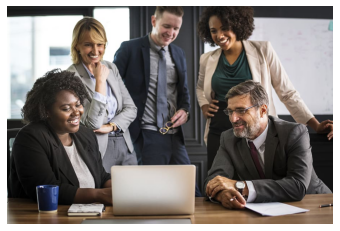

{'categories': [{'name': 'people_group', 'score': 0.7265625, 'detail': {'celebrities': [{'name': 'Ukinebo Dare', 'confidence': 0.7885736227035522, 'faceRectangle': {'left': 150, 'top': 262, 'width': 74, 'height': 74}}]}}], 'description': {'tags': ['person', 'indoor', 'people', 'group', 'conference room', 'crowd'], 'captions': [{'text': 'Ukinebo Dare et al. having a discussion', 'confidence': 0.5275333523750305}]}, 'faces': [{'age': 56, 'gender': 'Male', 'faceRectangle': {'left': 598, 'top': 271, 'width': 83, 'height': 83}}, {'age': 34, 'gender': 'Female', 'faceRectangle': {'left': 150, 'top': 262, 'width': 74, 'height': 74}}, {'age': 26, 'gender': 'Female', 'faceRectangle': {'left': 560, 'top': 48, 'width': 71, 'height': 71}}, {'age': 33, 'gender': 'Female', 'faceRectangle': {'left': 208, 'top': 90, 'width': 70, 'height': 70}}, {'age': 34, 'gender': 'Male', 'faceRectangle': {'left': 427, 'top': 45, 'width': 57, 'height': 57}}], 'objects': [{'rectangle': {'x': 81, 'y': 496, 'w': 72, 'h'

In [2]:
import requests
%matplotlib inline
import matplotlib.pyplot as plt
import json
from PIL import Image
from io import BytesIO

subscription_key = "2db8992a5d1a4151871a40377f7e39da"
analyze_url = "https://imagedetection.cognitiveservices.azure.com//vision/v3.1/analyze"
image_url = input("Enter your Image URL - ")
headers = {'Ocp-Apim-Subscription-Key' : subscription_key}
params = {'visualFeatures':'Categories,Description,Faces,Objects'}
data = {'url': image_url}

try:
    response = requests.post(analyze_url, headers =headers,params = params, json=data)
    response.raise_for_status()
    analysis = response.json()
except Exception as e:
    
    print("[Error {0}] {1}".format(e.error, e.strerror))
    
#Displaying the Image
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
plt.show()
print(analysis)




In [3]:
analysis['faces']


[{'age': 56,
  'gender': 'Male',
  'faceRectangle': {'left': 598, 'top': 271, 'width': 83, 'height': 83}},
 {'age': 34,
  'gender': 'Female',
  'faceRectangle': {'left': 150, 'top': 262, 'width': 74, 'height': 74}},
 {'age': 26,
  'gender': 'Female',
  'faceRectangle': {'left': 560, 'top': 48, 'width': 71, 'height': 71}},
 {'age': 33,
  'gender': 'Female',
  'faceRectangle': {'left': 208, 'top': 90, 'width': 70, 'height': 70}},
 {'age': 34,
  'gender': 'Male',
  'faceRectangle': {'left': 427, 'top': 45, 'width': 57, 'height': 57}}]

In [4]:
faces = []
for rec in analysis['faces']:
    k=[]
    k.append(rec['faceRectangle']['left'])
    k.append(rec['faceRectangle']['top'])
    k.append(rec['faceRectangle']['width'])
    k.append(rec['faceRectangle']['height'])
    faces.append(k)
faces
    

[[598, 271, 83, 83],
 [150, 262, 74, 74],
 [560, 48, 71, 71],
 [208, 90, 70, 70],
 [427, 45, 57, 57]]

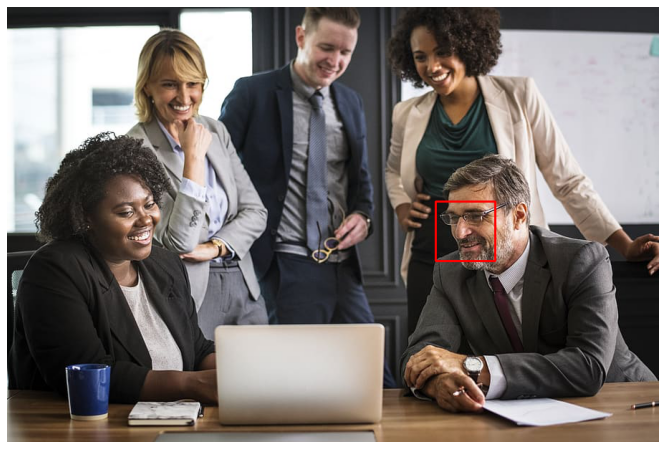

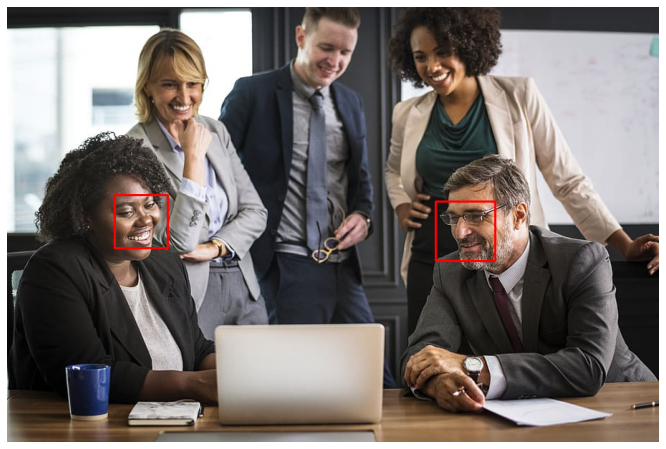

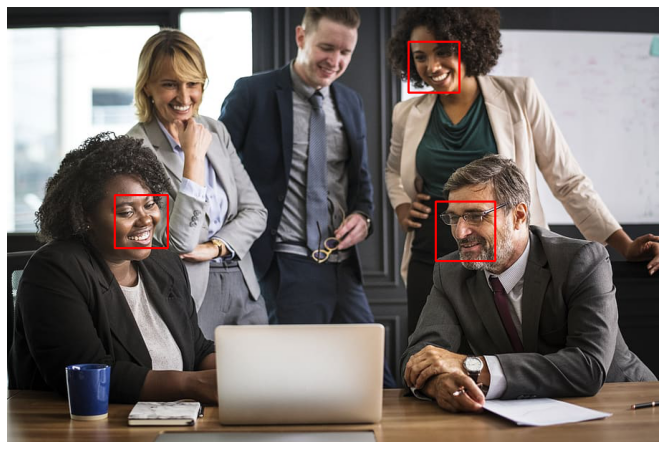

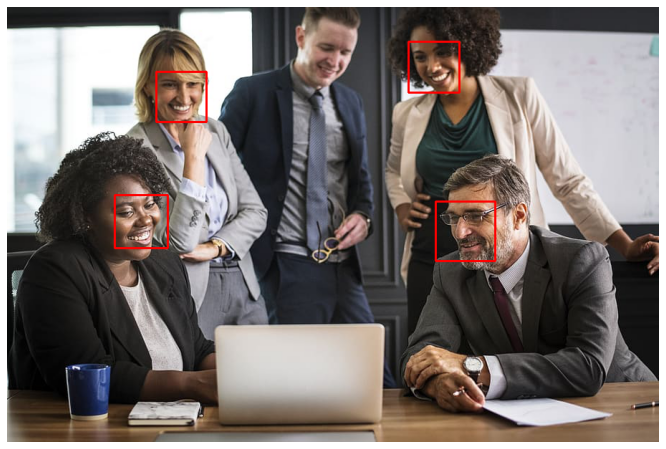

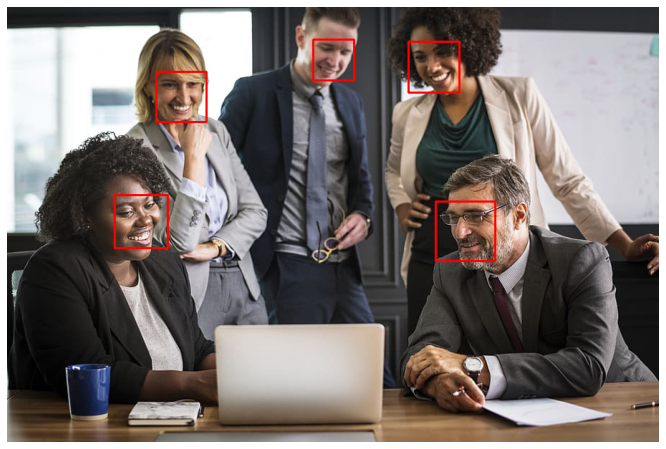

In [19]:
import numpy as np
import cv2

def generate_bounding_box(image_url , boundRect):
    image = Image.open(BytesIO(requests.get(image_url).content))
    np_img = np.array(image)
    drawing = np_img
    for i in range(len(boundRect)):
        color = (255,0,0)
        cv2.rectangle(drawing, (int(boundRect[i][0]),int(boundRect[i][1])),(int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color , 2)
        
        #showing image
        plt.figure(figsize=(14,8))
        plt.imshow(drawing)
        plt.axis("off")
        plt.show()
        
generate_bounding_box(image_url, faces)
